In [150]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
obj = pd.Series([-7, -5, 7, 4, 2, 0, 4])

In [3]:
obj

0   -7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [4]:
obj.rank(
    method="dense",
)

0    1.0
1    2.0
2    6.0
3    5.0
4    4.0
5    3.0
6    5.0
dtype: float64

In [5]:
obj.rank(method="first")

0    1.0
1    2.0
2    7.0
3    5.0
4    4.0
5    3.0
6    6.0
dtype: float64

In [6]:
frame = pd.DataFrame(
    {"b":[4.3, 7, -3, 2],
     "a":[0, 1, 0, 1],
     "c":[-2, 5, 8, -2.5]}
)

In [7]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [8]:
frame.rank(axis="columns",
           method="max",
           
          )

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


In [9]:
obj = pd.Series(np.arange(5),
                index=['a', 'a', 'b', 'b', 'c'])

In [10]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [11]:
obj.index.is_unique

False

In [12]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=['a', 'a', 'b', 'b', 'c'])

In [13]:
df

,0,1,2
a,-1.062172,1.826957,-1.089094
a,1.011273,-2.028325,-0.157120
b,-0.223672,-1.445255,-0.718791
b,-0.841794,-0.444993,0.495430
c,2.499903,-1.704839,0.756853


In [14]:
df.loc["a"]

,0,1,2
a,-1.062172,1.826957,-1.089094
a,1.011273,-2.028325,-0.157120


In [15]:
df.loc["c"]

0    2.499903
1   -1.704839
2    0.756853
Name: c, dtype: float64

In [16]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [17]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [18]:
df.sum(axis=0)

one    9.25
two   -5.80
dtype: float64

In [19]:
df.sum(axis="index",
       # skipna=False,
      )

one    9.25
two   -5.80
dtype: float64

In [20]:
df.sum(axis=1,
       # skipna=False,
      )

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [21]:
df.idxmax()

one    b
two    d
dtype: object

In [22]:
df.describe().loc['mean']

one    3.083333
two   -2.900000
Name: mean, dtype: float64

In [23]:
# non-numeric data
obj = pd.Series(['a', 'a', 'b', 'c']*4)

In [24]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [25]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [26]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [27]:
pd.Series(obj).value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

In [28]:
data = pd.DataFrame({"qu1": [1, 3, 4, 3, 4],
                     "qu2": [2, 3, 1, 2, 3],
                     "qu3": [1, 5, 2, 4, 4]})

In [29]:
data.qu1.value_counts().sort_index()

qu1
1    1
3    2
4    2
Name: count, dtype: int64

In [30]:
data.value_counts()

qu1  qu2  qu3
1    2    1      1
3    2    4      1
     3    5      1
4    1    2      1
     3    4      1
Name: count, dtype: int64

In [31]:
import sys

In [32]:
data.to_csv(sys.stdout, index=False, columns=['qu1', 'qu3'], sep="|")

qu1|qu3
1|1
3|5
4|2
3|4
4|4


In [33]:
import sqlite3

In [34]:
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20), c REAL, d INTEGER);"""

In [60]:
con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()

OperationalError: table test already exists

In [66]:
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]

In [67]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [68]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()

In [69]:
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [70]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [71]:
df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

In [72]:
df

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
3,Atlanta,Georgia,1.25,6
4,Tallahassee,Florida,2.60,3
5,Sacramento,California,1.70,5
6,Atlanta,Georgia,1.25,6
7,Tallahassee,Florida,2.60,3
8,Sacramento,California,1.70,5
9,Atlanta,Georgia,1.25,6


In [73]:
import sqlalchemy as sqla

In [74]:
db = sqla.create_engine("sqlite:///mydata.sqlite")

In [75]:
df = pd.read_sql("SELECT * FROM test", db)

In [76]:
df

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
3,Atlanta,Georgia,1.25,6
4,Tallahassee,Florida,2.60,3
5,Sacramento,California,1.70,5
6,Atlanta,Georgia,1.25,6
7,Tallahassee,Florida,2.60,3
8,Sacramento,California,1.70,5
9,Atlanta,Georgia,1.25,6


In [77]:
# drop duplicates
data = pd.DataFrame({"k1": ["one", "two"]*3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

In [78]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [79]:
# data.duplicated()

In [80]:
# data = data.drop_duplicates()

In [81]:
# data

In [82]:
data.loc[:,'v1'] = range(7)

In [83]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [84]:
data.drop_duplicates(subset=['k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [85]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon", "pastrami", "corned beef", "bacon", "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [86]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [87]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox" : "Salmon"
}

In [88]:
data['animal'] = data["food"].map(meat_to_animal)

In [89]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,Salmon


In [90]:
data = pd.Series([1., -999., 2.0, -999.0, -1000, -1000, 3])

In [91]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5   -1000.0
6       3.0
dtype: float64

In [92]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    NaN
6    3.0
dtype: float64

In [93]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    0.0
6    3.0
dtype: float64

In [94]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    0.0
6    3.0
dtype: float64

In [95]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5   -1000.0
6       3.0
dtype: float64

In [96]:
# binning and discretization
ages = [18, 22, 25, 26, 21, 23, 37, 31, 61, 45, 41, 32]

In [97]:
bins = [18, 25, 35, 60, 100]
# bins = 5

In [98]:
age_categories = pd.cut(ages, bins)

In [99]:
age_categories

[NaN, (18.0, 25.0], (18.0, 25.0], (25.0, 35.0], (18.0, 25.0], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [100]:
ages

[18, 22, 25, 26, 21, 23, 37, 31, 61, 45, 41, 32]

In [101]:
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])

In [102]:
df

,0,1
0,1.000,2.120
1,3.356,4.567


In [103]:
df_copy = df.copy()

In [104]:
df_copy.iloc[0,0] = pd.NA

In [105]:
df_copy

,0,1
0,NaN,2.120
1,3.356,4.567


In [106]:
df_copy.map(lambda x: len(str(x)), na_action=None)

,0,1
0,3,4
1,5,5


In [107]:
df

,0,1
0,1.000,2.120
1,3.356,4.567


In [108]:
df.map(round, ndigits=1)

,0,1
0,1.0,2.1
1,3.4,4.6


In [109]:
data = pd.DataFrame(np.arange(12).reshape(3, 4),
                    index=['Computer Engineering', 'Civil Engineering', 'Electrical Engineering'],
                    columns=['Year One', 'Year Two', 'Year Three', 'Year Four']
                   )

In [110]:
data

,Year One,Year Two,Year Three,Year Four
Computer Engineering,0,1,2,3
Civil Engineering,4,5,6,7
Electrical Engineering,8,9,10,11


In [111]:
def transform(x):
    return x[:4].upper()

In [112]:
data.index = data.index.map(transform)

In [113]:
data

,Year One,Year Two,Year Three,Year Four
COMP,0,1,2,3
CIVI,4,5,6,7
ELEC,8,9,10,11


In [114]:
data = data.rename(index=str.title,
                   columns=str.upper,
                  )

In [115]:
data

,YEAR ONE,YEAR TWO,YEAR THREE,YEAR FOUR
Comp,0,1,2,3
Civi,4,5,6,7
Elec,8,9,10,11


In [116]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,
      right=False,
      )

[[1.0, 3.0), [5.0, 7.006), [5.0, 7.006), [3.0, 5.0), [5.0, 7.006), [3.0, 5.0)]
Categories (3, interval[float64, left]): [[1.0, 3.0) < [3.0, 5.0) < [5.0, 7.006)]

In [117]:
# Binning with qcut
data = np.random.standard_normal(1000)
quartiles = pd.qcut(data, 4, precision=2)

In [118]:
quartiles

[(0.62, 2.92], (0.62, 2.92], (-3.3899999999999997, -0.69], (-0.69, -0.032], (-3.3899999999999997, -0.69], ..., (-3.3899999999999997, -0.69], (0.62, 2.92], (0.62, 2.92], (-0.032, 0.62], (-0.69, -0.032]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.3899999999999997, -0.69] < (-0.69, -0.032] < (-0.032, 0.62] < (0.62, 2.92]]

In [119]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))

In [120]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.019730,0.000506,-0.049681,-0.014979
std,1.014752,0.999216,1.022469,0.990817
min,-3.700233,-3.152346,-3.154050,-2.812540
25%,-0.687141,-0.687237,-0.760392,-0.690760
50%,0.065389,0.049134,-0.055636,-0.029656
75%,0.693528,0.664652,0.661981,0.653431
max,3.312877,3.259556,2.735806,3.513945


In [121]:
# Getting outliers where value is greater than three in any column
data[(data.abs() > 3).any(axis="columns")] 

,0,1,2,3
29,-3.654417,-0.929641,-0.903584,-0.141959
34,-0.623032,3.259556,1.315457,-0.095717
251,-3.029240,0.793360,-0.204537,-0.113883
268,1.889087,-3.152346,0.932724,-0.629431
303,-0.109301,-1.135843,-0.805190,3.513945
576,-0.685012,0.031559,-3.154050,-0.659429
661,-3.700233,1.788347,0.543727,0.311621
750,3.312877,0.975966,2.350690,0.704507
999,-3.031795,-0.705511,-0.684745,0.260762


In [122]:
# Capping the outlier values to 3
data[data.abs() > 3] = np.sign(data) * 3

In [123]:
data[(data.abs() == 3).any(axis="columns")]

,0,1,2,3
29,-3.000000,-0.929641,-0.903584,-0.141959
34,-0.623032,3.000000,1.315457,-0.095717
251,-3.000000,0.793360,-0.204537,-0.113883
268,1.889087,-3.000000,0.932724,-0.629431
303,-0.109301,-1.135843,-0.805190,3.000000
576,-0.685012,0.031559,-3.000000,-0.659429
661,-3.000000,1.788347,0.543727,0.311621
750,3.000000,0.975966,2.350690,0.704507
999,-3.000000,-0.705511,-0.684745,0.260762


In [124]:
# Permutations
df = pd.DataFrame(np.arange(5*7).reshape((5, 7)))

In [125]:
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [126]:
sampler = np.random.permutation(5)

In [127]:
sampler

array([2, 3, 4, 0, 1])

In [128]:
# Sampling
df.take(sampler)

,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13


In [129]:
df = pd.DataFrame({"key": ['b', 'b', 'a', 'c', 'a', 'b'],
                   "data1": range(6)})

In [130]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [131]:
pd.get_dummies(df["key"])

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [132]:
s = pd.Series(list('abca'))

In [133]:
s

0    a
1    b
2    c
3    a
dtype: object

In [134]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


In [135]:
s1 = ['a', 'b', np.nan]

In [136]:
pd.get_dummies(s1)

,a,b
0,True,False
1,False,True
2,False,False


In [137]:
pd.get_dummies(s1,
               dummy_na=True,
              prefix="key",
              prefix_sep = "-",
              )

,key-a,key-b,key-nan
0,True,False,False
1,False,True,False
2,False,False,True


In [138]:
s1 = pd.Series(["a|b", "a", "a|c"])

In [139]:
s1

0    a|b
1      a
2    a|c
dtype: object

In [140]:
s1.str.get_dummies()

,a,b,c
0,1,1,0
1,1,0,0
2,1,0,1


In [141]:
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())

In [142]:
s

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [143]:
s.isna()

0    False
1    False
2    False
3     True
dtype: bool

In [144]:
s.dtype

Int64Dtype()

In [145]:
s[3]

<NA>

In [146]:
s[3] is pd.NA

True

In [147]:
s = pd.Series(["one", "two", None, "three'"], dtype=pd.StringDtype())

In [148]:
s

0       one
1       two
2      <NA>
3    three'
dtype: string

In [149]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})

In [150]:
df

,A,B,C
0,1.0,one,False
1,2.0,two,None
2,NaN,three,False
3,4.0,None,True


In [151]:
df['A'] = df['A'].astype("Int64")
df['B'] = df['B'].astype("string")
df["C"] = df["C"].astype("boolean")

In [152]:
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


In [153]:
import re

In [154]:
text = "foo bar\t baz \tqux"

In [155]:
re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

In [156]:
regex = re.compile(r"\s+")

In [157]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [158]:
regex.findall(text)

[' ', '\t ', ' \t']

In [159]:
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

In [160]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
steven.kakaire@mak.ac.ug
Ryan ryan@yahoo.com"""

In [161]:
text

'Dave dave@google.com\nSteve steve@gmail.com\nRob rob@gmail.com\nsteven.kakaire@mak.ac.ug\nRyan ryan@yahoo.com'

In [162]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [163]:
regex.findall(text)

['dave@google.com',
 'steve@gmail.com',
 'rob@gmail.com',
 'steven.kakaire@mak.ac.ug',
 'ryan@yahoo.com']

In [164]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [165]:
m = regex.search(text)

In [166]:
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [167]:
m.start()

5

In [168]:
m.end()

20

In [169]:
text[m.start():m.end()]

'dave@google.com'

In [170]:
indexPattern = r'U+[0-9]+/[0-9]+'

In [171]:
regexIndex = re.compile(indexPattern, flags=re.IGNORECASE)

In [172]:
regexIndex.match('U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)')[0]

'U0391/673'

In [173]:
student = 'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [174]:
pd.Series(student.split()).str.contains('M')

0     False
1     False
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9     False
10    False
dtype: bool

In [175]:
namePattern = r'([A-Z]+){2,10}'

In [176]:
regexName = re.compile(namePattern, flags=re.IGNORECASE)

In [177]:
regexName.findall(student)

['E', 'S', 'M', 'O', 'C', 'C', 'g', 'E']

In [178]:
student = 'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [179]:
# regex.match('U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)')[0]

In [180]:
pattern = r"\b[a-zA-Z\\]+"

In [181]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [182]:
m = re.match(pattern, student)

In [183]:
m

<re.Match object; span=(0, 1), match='U'>

In [184]:
yearPattern = r"\b[0-9]{4}"

In [185]:
regex = re.compile(yearPattern)

In [186]:
regex.findall(student)

['2022']

In [187]:
student

'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [188]:
# print(regex.sub("REDACTED", text))

In [189]:
# pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9._]+)\.([A-Z]{2,4})"

In [190]:
# regex = re.compile(pattern, flags=re.IGNORECASE)

In [191]:
# m = regex.match("wesm@right.net")

In [192]:
# m.groups()

In [193]:
# kakaire = regex.match("steven.kakaire@mak.ac.ug")

In [194]:
# kakaire.groups()

In [195]:
# regex.findall(text)

In [196]:
# raw string needs not to be written on multiple lines.
# print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3",
#                 text))

In [197]:
# print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))

<h1>STRING MANIPULATION</h1>
<p>Real world data is messy and requires a lot of string manipulation.</p>

In [198]:
import re
import pandas as pd
import numpy as np

In [199]:
data = {"Hawa Jamal": "hawa.jamal@gmail.com",
        "King Kakaire": "steven.kakaire@mak.ac.ug",
        "Nalubega Daisy Mercy": "daisy.nalubega@yahoo.com",
        "rashidah Naluwongo": np.nan
       }

In [200]:
data = pd.Series(data)

In [201]:
data

Hawa Jamal                  hawa.jamal@gmail.com
King Kakaire            steven.kakaire@mak.ac.ug
Nalubega Daisy Mercy    daisy.nalubega@yahoo.com
rashidah Naluwongo                           NaN
dtype: object

In [202]:
data.str.contains("com")

Hawa Jamal               True
King Kakaire            False
Nalubega Daisy Mercy     True
rashidah Naluwongo        NaN
dtype: object

In [203]:
s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.nan])

In [204]:
s1.str.contains('og', regex=False)

0    False
1     True
2    False
3    False
4      NaN
dtype: object

In [205]:
s1.loc[s1.str.contains('house | parrot', na=False)]

2    house and parrot
dtype: object

In [206]:
# Specifying na to be True
s1.str.contains('og', na=False, regex=True)

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [207]:
# ignoring sensitivity
s1.str.contains('PARROT', flags=re.IGNORECASE, regex=True)

0    False
1    False
2     True
3    False
4      NaN
dtype: object

In [208]:
s2 = pd.Series(['40', '40.0', '41', '41.0', '35'])

In [209]:
s2.str.contains('.0', regex=True)

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [210]:
s2.str.contains('//d', regex=True)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [211]:
data

Hawa Jamal                  hawa.jamal@gmail.com
King Kakaire            steven.kakaire@mak.ac.ug
Nalubega Daisy Mercy    daisy.nalubega@yahoo.com
rashidah Naluwongo                           NaN
dtype: object

In [212]:
data_as_string_ext = data.astype('string')

In [213]:
data_as_string_ext

Hawa Jamal                  hawa.jamal@gmail.com
King Kakaire            steven.kakaire@mak.ac.ug
Nalubega Daisy Mercy    daisy.nalubega@yahoo.com
rashidah Naluwongo                          <NA>
dtype: string

In [214]:
data_as_string_ext.str.contains("mak")

Hawa Jamal              False
King Kakaire             True
Nalubega Daisy Mercy    False
rashidah Naluwongo       <NA>
dtype: boolean

In [215]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

In [216]:
data.str.findall(pattern, flags=re.IGNORECASE)

Hawa Jamal                  [(hawa.jamal, gmail, com)]
King Kakaire            [(steven.kakaire, mak.ac, ug)]
Nalubega Daisy Mercy    [(daisy.nalubega, yahoo, com)]
rashidah Naluwongo                                 NaN
dtype: object

In [217]:
data.str.findall(pattern, flags=re.IGNORECASE).iloc[0]

[('hawa.jamal', 'gmail', 'com')]

In [218]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]

In [219]:
matches.str.get(1)

Hawa Jamal               gmail
King Kakaire            mak.ac
Nalubega Daisy Mercy     yahoo
rashidah Naluwongo         NaN
dtype: object

In [220]:
data.str.extract(pattern, flags=re.IGNORECASE)

,0,1,2
Hawa Jamal,hawa.jamal,gmail,com
King Kakaire,steven.kakaire,mak.ac,ug
Nalubega Daisy Mercy,daisy.nalubega,yahoo,com
rashidah Naluwongo,NaN,NaN,NaN


<h1>Categoriacal Data</h1>

In [221]:
values = pd.Series(['apple', 'orange', 'apple','apple']*2)

In [222]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [223]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [224]:
values = pd.Series([0, 1, 0, 0, 0]*2)

In [225]:
values

0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
dtype: int64

In [226]:
dim = pd.Series(['apple', 'orange'])

In [227]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
0     apple
dtype: object

In [228]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [229]:
N = len(fruits)

In [230]:
fruits

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']

In [231]:
rng = np.random.default_rng(seed=1234)

In [232]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, N),
                   'weight': rng.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])

In [233]:
df

,basket_id,fruit,count,weight
0,0,apple,14,1.276388
1,1,orange,14,0.472365
2,2,apple,14,0.967065
3,3,apple,7,1.274136
4,4,apple,5,3.856317
5,5,orange,14,1.054599
6,6,apple,4,1.764024
7,7,apple,6,2.439483


In [234]:
df['fruit']

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: object

In [235]:
fruit_cat = df['fruit'].astype('category')

In [236]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [237]:
c = fruit_cat.array

In [238]:
c

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']
Categories (2, object): ['apple', 'orange']

In [239]:
type(c)

pandas.core.arrays.categorical.Categorical

In [240]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [241]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

<h3>Enumerate</h3>

In [242]:
colleges = ['Engineering', 'Natural Sciences', 'Health Sciences', 'Humanities', 'Business Management', 'Veterinary', 'Agriculture']

In [243]:
colleges

['Engineering',
 'Natural Sciences',
 'Health Sciences',
 'Humanities',
 'Business Management',
 'Veterinary',
 'Agriculture']

In [244]:
list(enumerate(colleges))

[(0, 'Engineering'),
 (1, 'Natural Sciences'),
 (2, 'Health Sciences'),
 (3, 'Humanities'),
 (4, 'Business Management'),
 (5, 'Veterinary'),
 (6, 'Agriculture')]

In [245]:
for index, college in enumerate(colleges):
    print(index, college)

0 Engineering
1 Natural Sciences
2 Health Sciences
3 Humanities
4 Business Management
5 Veterinary
6 Agriculture


In [246]:
dict(enumerate(c.categories))

{0: 'apple', 1: 'orange'}

In [247]:
categories = ['CEDAT', 'CONAS', 'CHS']

In [248]:
codes = [0, 1, 2, 0, 0, 1]

In [249]:
my_cats = pd.Categorical.from_codes(codes, categories)

In [250]:
my_cats

['CEDAT', 'CONAS', 'CHS', 'CEDAT', 'CEDAT', 'CONAS']
Categories (3, object): ['CEDAT', 'CONAS', 'CHS']

In [251]:
ordered_cat = pd.Categorical.from_codes(codes, categories, ordered=True)

In [252]:
ordered_cat

['CEDAT', 'CONAS', 'CHS', 'CEDAT', 'CEDAT', 'CONAS']
Categories (3, object): ['CEDAT' < 'CONAS' < 'CHS']

In [253]:
my_cats.as_ordered()

['CEDAT', 'CONAS', 'CHS', 'CEDAT', 'CEDAT', 'CONAS']
Categories (3, object): ['CEDAT' < 'CONAS' < 'CHS']

In [254]:
draws = rng.standard_normal(1000)

In [255]:
draws[:5]

array([ 1.18199165,  1.32375896, -0.86028019,  0.5194932 , -1.26514372])

In [256]:
bins = pd.qcut(draws, 4)

In [257]:
bins

[(0.715, 4.083], (0.715, 4.083], (-2.7689999999999997, -0.623], (0.0111, 0.715], (-2.7689999999999997, -0.623], ..., (-0.623, 0.0111], (0.0111, 0.715], (0.0111, 0.715], (-2.7689999999999997, -0.623], (0.715, 4.083]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.7689999999999997, -0.623] < (-0.623, 0.0111] < (0.0111, 0.715] < (0.715, 4.083]]

In [258]:
# Using labels
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [259]:
bins

['Q4', 'Q4', 'Q1', 'Q3', 'Q1', ..., 'Q2', 'Q3', 'Q3', 'Q1', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [260]:
bins = pd.Series(bins, name='quartile')

In [261]:
bins

0      Q4
1      Q4
2      Q1
3      Q3
4      Q1
       ..
995    Q2
996    Q3
997    Q3
998    Q1
999    Q4
Name: quartile, Length: 1000, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

<h3>Descriptive Statistics</h3>

In [262]:
result = (pd.Series(draws).groupby(bins, observed=True).agg(['count', 'min', 'max']).reset_index())

In [263]:
result

,quartile,count,min,max
0,Q1,250,-2.768287,-0.629130
1,Q2,250,-0.620532,0.008925
2,Q3,250,0.013182,0.714422
3,Q4,250,0.715456,4.083158


In [264]:
# Advantages of categorical data
N = 10_000_000
labels = pd.Series(['foo', 'bar', 'baz', 'qux']*(N//4))

In [265]:
labels

0          foo
1          bar
2          baz
3          qux
4          foo
          ... 
9999995    qux
9999996    foo
9999997    bar
9999998    baz
9999999    qux
Length: 10000000, dtype: object

In [266]:
categories = labels.astype('category')

In [267]:
categories

0          foo
1          bar
2          baz
3          qux
4          foo
          ... 
9999995    qux
9999996    foo
9999997    bar
9999998    baz
9999999    qux
Length: 10000000, dtype: category
Categories (4, object): ['bar', 'baz', 'foo', 'qux']

In [268]:
labels.memory_usage(deep=True)

520000132

In [269]:
categories.memory_usage(deep=True)

10000512

In [270]:
# Labels use more memory than categories

In [271]:
%time _ = labels.astype('category')

CPU times: total: 266 ms
Wall time: 400 ms


In [272]:
%timeit labels.value_counts()

374 ms ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [273]:
%timeit categories.value_counts()

38.8 ms ± 662 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [274]:
# categories take a significantly shorter time than labels

<h3>Categorical methods</h3>

In [275]:
s = pd.Series(['a', 'b', 'c', 'd']*2)

In [276]:
cat_s = s.astype('category')

In [277]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [278]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [279]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [280]:
# setting categories
actual_categories = ['a', 'b', 'c', 'd', 'e']

In [281]:
# set categories beyond the observed categories in data
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [282]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [283]:
cat_s.value_counts()

a    2
b    2
c    2
d    2
Name: count, dtype: int64

In [284]:
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
Name: count, dtype: int64

In [285]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [286]:
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [287]:
# Removing unused categories
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

In [288]:
# dummy variables
cat_s = pd.Series(['a', 'b', 'c', 'd']*2, dtype='category')

In [289]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [290]:
pd.get_dummies(cat_s)

,a,b,c,d
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,False,True


<h1>Data Wrangling: Join, Combine, and Reshape</h1>

In [291]:
data = pd.Series(np.random.uniform(size=9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [292]:
data

a  1    0.966788
   2    0.465533
   3    0.790975
b  1    0.258191
   3    0.793207
c  1    0.074547
   2    0.554717
d  2    0.621715
   3    0.056780
dtype: float64

In [293]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [294]:
data['b']

1    0.258191
3    0.793207
dtype: float64

In [295]:
data['a':'b']

a  1    0.966788
   2    0.465533
   3    0.790975
b  1    0.258191
   3    0.793207
dtype: float64

In [296]:
data[['a', 'd']]

a  1    0.966788
   2    0.465533
   3    0.790975
d  2    0.621715
   3    0.056780
dtype: float64

In [297]:
data.loc[:, 3]

a    0.790975
b    0.793207
d    0.056780
dtype: float64

In [298]:
data.unstack()

,1,2,3
a,0.966788,0.465533,0.790975
b,0.258191,NaN,0.793207
c,0.074547,0.554717,NaN
d,NaN,0.621715,0.056780


In [299]:
data

a  1    0.966788
   2    0.465533
   3    0.790975
b  1    0.258191
   3    0.793207
c  1    0.074547
   2    0.554717
d  2    0.621715
   3    0.056780
dtype: float64

In [300]:
data.unstack()

,1,2,3
a,0.966788,0.465533,0.790975
b,0.258191,NaN,0.793207
c,0.074547,0.554717,NaN
d,NaN,0.621715,0.056780


In [301]:
# Reversing the stack operation
data.unstack().stack()

a  1    0.966788
   2    0.465533
   3    0.790975
b  1    0.258191
   3    0.793207
c  1    0.074547
   2    0.554717
d  2    0.621715
   3    0.056780
dtype: float64

In [302]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'c'],
                            [1, 2, 1, 2]],
                     columns=[["Kampala", "Iganga", "Iganga"],
                              ["Green", "Orange", "Orange"]])

In [303]:
frame

Kampala Iganga       
      Green Orange Orange
a 1       0      1      2
  2       3      4      5
b 1       6      7      8
c 2       9     10     11

In [304]:
frame.index.names = ["key 1", "key 2"]

In [305]:
frame.columns.names = ["City", "Color"]

In [306]:
frame

City        Kampala Iganga       
Color         Green Orange Orange
key 1 key 2                      
a     1           0      1      2
      2           3      4      5
b     1           6      7      8
c     2           9     10     11

In [307]:
# number of the frame index level
frame.index.nlevels

2

In [308]:
# number of frame column level
frame.columns.nlevels

2

In [309]:
frame['Iganga']

Color        Orange  Orange
key 1 key 2                
a     1           1       2
      2           4       5
b     1           7       8
c     2          10      11

In [310]:
frame.swaplevel("key 1", "key 2")

City        Kampala Iganga       
Color         Green Orange Orange
key 2 key 1                      
1     a           0      1      2
2     a           3      4      5
1     b           6      7      8
2     c           9     10     11

In [311]:
frame.swaplevel(0, 1).sort_index(level=0)

City        Kampala Iganga       
Color         Green Orange Orange
key 2 key 1                      
1     a           0      1      2
      b           6      7      8
2     a           3      4      5
      c           9     10     11

In [312]:
frame.groupby(level="key 2").sum()

City  Kampala Iganga       
Color   Green Orange Orange
key 2                      
1           6      8     10
2          12     14     16

In [313]:
frame.T.groupby(level="Color").sum()

key 1   a      b   c
key 2   1  2   1   2
Color               
Green   0  3   6   9
Orange  3  9  15  21

In [314]:
frame = pd.DataFrame({"a": range(7),
                      "b": range(7, 0, -1),
                      "c": ["one", "one", "one", "two", "two", "two", "two"],
                      "d": [0, 1, 2, 0, 1, 2, 3]})

In [315]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [316]:
frame2 = frame.set_index(["c", "d"])

In [317]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [318]:
frame = frame.set_index(['c', 'd'],
                # drop=False,
               # append=True,
               )

In [319]:
frame.reset_index(
                inplace=True
                 )

In [320]:
frame

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


<h3>Combining and Merging Data</h3>

In [2]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})

In [3]:
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3),
                                             dtype="Int64")})                    

In [4]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [5]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [6]:
pd.merge(df1, df2,
         on="key",
         how="right"
        )

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,d,<NA>,2


In [7]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": pd.Series(range(6), dtype="Int64")})

In [8]:
df2 = pd.DataFrame({"key": ['a', 'b', 'a', 'b', 'd'],
                    "data2": pd.Series(range(5),
                                       dtype="Int64")})

In [9]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [10]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [11]:
pd.merge(df1, df2, on="key", how="left")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


<h3>Merging on Index</h3>

In [12]:
left1 = pd.DataFrame({"key": ['a', 'b', 'a', 'a', 'b', 'c'],
                      "value": pd.Series(range(6), dtype='Int64')})

In [13]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [14]:
right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])

In [15]:
right1

,group_val
a,3.5
b,7.0


In [16]:
pd.merge(left1, right1, left_on="key",
         right_index=True,
        )

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0


In [17]:
# Merging on multilevel indexes
lefth = pd.DataFrame({"key1": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada"],
                      "key2": [2000, 2001, 2002, 2001, 2002],
                      "data": pd.Series(range(5), dtype="Int64")})

In [18]:
lefth

,key1,key2,data
0,Ohio,2000,0
1,Ohio,2001,1
2,Ohio,2002,2
3,Nevada,2001,3
4,Nevada,2002,4


In [19]:
righth_index = pd.MultiIndex.from_arrays([["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
                                        [2001, 2000, 2000, 2001, 2001, 2002]])

In [20]:
righth_index

MultiIndex([('Nevada', 2001),
            ('Nevada', 2000),
            (  'Ohio', 2000),
            (  'Ohio', 2001),
            (  'Ohio', 2001),
            (  'Ohio', 2002)],
           )

In [21]:
righth = pd.DataFrame({"event1": pd.Series([0, 2, 4, 6, 8, 10], dtype="Int64", index=righth_index),
                       "event2": pd.Series([1, 3, 5, 7, 9, 11], dtype="Int64",
                       index=righth_index)
                      })

In [22]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2001       6       7
       2001       8       9
       2002      10      11

In [23]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
1,Ohio,2001,1,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1


In [24]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True,
        how="outer")

,key1,key2,data,event1,event2
4,Nevada,2000,<NA>,2,3
3,Nevada,2001,3,0,1
4,Nevada,2002,4,<NA>,<NA>
0,Ohio,2000,0,4,5
1,Ohio,2001,1,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11


In [25]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=["a", "c", "e"],
                     columns=["Ohio", "Nevada"]).astype("Int64")

In [26]:
left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [27]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13., 14.]],
                      index=["b", "c", "d", "e"],
                      columns=["Missouri", "Alabama"]
                     ).astype("Int64")

In [28]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [29]:
pd.merge(left2, right2,
         how="outer",
         left_index=True,
         right_index=True,
        )

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [30]:
# Join
left2.join(right2, how="outer")

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [31]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [32]:
right1

,group_val
a,3.5
b,7.0


In [33]:
left1.join(right1, on="key")

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [34]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])

In [35]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [36]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0


In [37]:
left2.join([right2, another],
           how="outer")

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0
b,<NA>,<NA>,7,8,NaN,NaN
d,<NA>,<NA>,11,12,NaN,NaN
f,<NA>,<NA>,<NA>,<NA>,16.0,17.0


<h3>Concatenation</h3>

In [38]:
arr = np.arange(12).reshape((3, 4))

In [39]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [40]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [41]:
s1 = pd.Series([0, 1], index=['a', 'b'], dtype="Int64")

In [42]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'], dtype="Int64")

In [43]:
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")

In [44]:
s1

a    0
b    1
dtype: Int64

In [45]:
s2

c    2
d    3
e    4
dtype: Int64

In [46]:
s3

f    5
g    6
dtype: Int64

In [47]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [48]:
# Concatenating along the columns
pd.concat([s1, s1, s3], axis=1)

,0,1,2
a,0,0,<NA>
b,1,1,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [49]:
pd.concat([s1, s2, s3], axis="columns")

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [50]:
s4 = pd.concat([s1, s3], axis="columns", join="inner")

In [51]:
s4

,0,1


In [52]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [53]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: Int64

In [54]:
result.unstack()

,a,b,f,g
one,0,1,<NA>,<NA>
two,0,1,<NA>,<NA>
three,<NA>,<NA>,5,6


In [55]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2),
                   index=['a', 'b', 'c'],
                   columns=['one', 'two'])

In [56]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [57]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index=['a', 'c'],
                   columns=['three', 'four'])

In [58]:
df2

,three,four
a,5,6
c,7,8


In [59]:
pd.concat([df1, df2], 
          axis="columns", 
          keys=["level1", "level2"],
         # join="inner",
          # ignore_index=True,
         )

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [60]:
pd.concat({"level1": df1,
           "level2": df2},
          axis="columns",
         join="inner")

level1     level2     
     one two  three four
a      0   1      5    6
c      4   5      7    8

In [61]:
pd.concat([df1, df2],
          axis="columns",
          keys=["level1", "level2"],
          names=["upper", "lower"])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [62]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),
                   columns=['a', 'b', 'c', 'd'])

In [63]:
df2 = pd.DataFrame(np.random.standard_normal((2, 3)),
                   columns=['b', 'd', 'a'])

In [64]:
df1

,a,b,c,d
0,-0.437604,0.013831,-1.130795,0.919885
1,0.932829,-0.664222,2.124663,-0.079214
2,-1.718135,0.833673,-0.517758,-1.317199


In [65]:
df2

,b,d,a
0,0.190731,1.205293,-3.040717
1,-0.874982,0.354148,0.834817


In [66]:
pd.concat([df1, df2],
         ignore_index=True,
         )

,a,b,c,d
0,-0.437604,0.013831,-1.130795,0.919885
1,0.932829,-0.664222,2.124663,-0.079214
2,-1.718135,0.833673,-0.517758,-1.317199
3,-3.040717,0.190731,NaN,1.205293
4,0.834817,-0.874982,NaN,0.354148


In [67]:
# overlap
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [68]:
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5],
              index=['a', 'b', 'c', 'd', 'e', 'f'])

In [69]:
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [70]:
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [71]:
# if an element in a is not a number, replce with b's
np.where(pd.isna(a), b, a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [72]:
pd.isna(a)

f     True
e    False
d    False
c    False
b    False
a     True
dtype: bool

In [73]:
a.combine_first(b)

a    0.0
b    4.5
c    3.5
d    0.0
e    2.5
f    5.0
dtype: float64

In [74]:
df1 = pd.DataFrame({"a":[1., np.nan, 5., np.nan],
                    "b":[np.nan, 2., np.nan, 6.],
                    "c":range(2, 18, 4)})

In [75]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [76]:
df2 = pd.DataFrame({"a":[5., 4., np.nan, 3., 7.],
                    "b":[np.nan, 3., 4., 6., 8.]})

In [77]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [78]:
# Replace a with non-null value of b if null or else maintain.
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


<h3>Reshaping and Pivoting</h3>

In [79]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Iganga', 'Jinja'], name="City"),
                    columns = pd.Index(["One", "two", "three"],
                                       name="number"))

In [80]:
data

number,One,two,three
City,,,
Iganga,0,1,2
Jinja,3,4,5


In [81]:
result = data.stack()

In [82]:
result

City    number
Iganga  One       0
        two       1
        three     2
Jinja   One       3
        two       4
        three     5
dtype: int32

In [83]:
# By default, the inner level is unstacked, 
result.unstack(level=0)

City,Iganga,Jinja
number,,
One,0,3
two,1,4
three,2,5


In [84]:
result.unstack(level="City")

City,Iganga,Jinja
number,,
One,0,3
two,1,4
three,2,5


In [85]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'],
               dtype='int64')

In [86]:
s1

a    0
b    1
c    2
d    3
dtype: int64

In [87]:
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'],
               dtype='Int64')

In [88]:
s2

c    4
d    5
e    6
dtype: Int64

In [89]:
data = pd.concat([s1, s2], keys=['one', 'two'])

In [90]:
data

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [91]:
df = pd.DataFrame({"left": result, "right": result + 5},
                  columns = pd.Index(["left", "right"],
                                     name="side"))

In [92]:
df

side           left  right
City   number             
Iganga One        0      5
       two        1      6
       three      2      7
Jinja  One        3      8
       two        4      9
       three      5     10

In [93]:
# The level unstacked become the lowest in the result
df.unstack(level="City")

side     left        right      
City   Iganga Jinja Iganga Jinja
number                          
One         0     3      5     8
two         1     4      6     9
three       2     5      7    10

In [94]:
# load csv data
data = pd.read_csv('../Data/macrodata.csv')

In [95]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [96]:
data = data.loc[:, ['year', 'quarter', 'realgdp', 'infl', 'unemp']]

In [97]:
data

,year,quarter,realgdp,infl,unemp
0,1959,1,2710.349,0.00,5.8
1,1959,2,2778.801,2.34,5.1
2,1959,3,2775.488,2.74,5.3
3,1959,4,2785.204,0.27,5.6
4,1960,1,2847.699,2.31,5.2
...,...,...,...,...,...
198,2008,3,13324.600,-3.16,6.0
199,2008,4,13141.920,-8.79,6.9
200,2009,1,12925.410,0.94,8.1
201,2009,2,12901.504,3.37,9.2


In [98]:
periods = pd.PeriodIndex.from_fields(year=data.pop("year"),
                         quarter=data.pop("quarter"),
                         # name="date"
                                    )

In [99]:
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [100]:
data

,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [101]:
data.index = periods.to_timestamp("D")

In [102]:
data

,realgdp,infl,unemp
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2
...,...,...,...
2008-07-01,13324.600,-3.16,6.0
2008-10-01,13141.920,-8.79,6.9
2009-01-01,12925.410,0.94,8.1
2009-04-01,12901.504,3.37,9.2


In [103]:
data = data.reindex(columns=['realgdp', 'infl', 'unemp'])

In [104]:
data.columns.name = 'item'

In [105]:
data

item,realgdp,infl,unemp
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2
...,...,...,...
2008-07-01,13324.600,-3.16,6.0
2008-10-01,13141.920,-8.79,6.9
2009-01-01,12925.410,0.94,8.1
2009-04-01,12901.504,3.37,9.2


In [106]:
long_data = (data.stack().reset_index().rename(columns={0:"value"}))

In [107]:
long_data

,level_0,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
...,...,...,...
604,2009-04-01,infl,3.370
605,2009-04-01,unemp,9.200
606,2009-07-01,realgdp,12990.341
607,2009-07-01,infl,3.560


In [108]:
# Pivoting
pivoted = long_data.pivot(index='level_0',
                          columns='item',
                          values="value")

In [109]:
pivoted

item,infl,realgdp,unemp
level_0,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2
...,...,...,...
2008-07-01,-3.16,13324.600,6.0
2008-10-01,-8.79,13141.920,6.9
2009-01-01,0.94,12925.410,8.1


In [110]:
long_data.head()

,level_0,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340


In [111]:
long_data.set_index(["level_0", "item"]).unstack(level='item')

value                 
item        infl    realgdp unemp
level_0                          
1959-01-01  0.00   2710.349   5.8
1959-04-01  2.34   2778.801   5.1
1959-07-01  2.74   2775.488   5.3
1959-10-01  0.27   2785.204   5.6
1960-01-01  2.31   2847.699   5.2
...          ...        ...   ...
2008-07-01 -3.16  13324.600   6.0
2008-10-01 -8.79  13141.920   6.9
2009-01-01  0.94  12925.410   8.1
2009-04-01  3.37  12901.504   9.2
2009-07-01  3.56  12990.341   9.6

[203 rows x 3 columns]

In [112]:
pivoted = long_data.pivot(index='level_0',
                          columns='item',
                          values='value')

In [113]:
pivoted

item,infl,realgdp,unemp
level_0,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2
...,...,...,...
2008-07-01,-3.16,13324.600,6.0
2008-10-01,-8.79,13141.920,6.9
2009-01-01,0.94,12925.410,8.1


In [114]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [115]:
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [116]:
df.pivot(index='foo',
         columns='bar',
         values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [117]:
df.pivot(index='foo',
         columns='bar',
        )['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [118]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [130]:
df = pd.DataFrame({
    "lev1": [1, 1, 1, 2, 2, 2],
    "lev2": [1, 1, 2, 1, 1, 2],
    "lev3": [1, 2, 1, 2, 1, 2],
    "lev4": [1, 2, 3, 4, 5, 6],
    "values": [0, 1, 2, 3, 4, 5]
})

In [131]:
df

,lev1,lev2,lev3,lev4,values
0,1,1,1,1,0
1,1,1,2,2,1
2,1,2,1,3,2
3,2,1,2,4,3
4,2,1,1,5,4
5,2,2,2,6,5


In [132]:
df.pivot(index="lev1",
         columns=["lev2", "lev3"],
         values="values"
        )

lev2    1         2     
lev3    1    2    1    2
lev1                    
1     0.0  1.0  2.0  NaN
2     4.0  3.0  NaN  5.0

In [133]:
# Using melt

df = pd.DataFrame({
    "key": ["foo", "bar", "baz"],
    "A": [1, 2, 3],
    "B": [4, 5, 6],
    "C": [7, 8, 9]
})

In [134]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [135]:
melted = pd.melt(df, id_vars="key")

In [136]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [138]:
reshaped = melted.pivot(index="key",
             columns="variable",
             values="value")

In [139]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [141]:
# Moving data back into the column
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [144]:
# Selecting a subset of columns
pd.melt(df, id_vars="key",
        value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [145]:
# Without using group identifiers
pd.melt(df, value_vars=["A", "B"])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6


In [146]:
# Including key under value_vars
pd.melt(df, value_vars=["key", "A", "B"])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


<h1>Visualization</h1>
<p>Visualization using matplotlib, Seaborn</p>

In [148]:
%matplotlib inline

In [151]:
import matplotlib.pyplot as plt

In [152]:
data = np.arange(10)

In [153]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

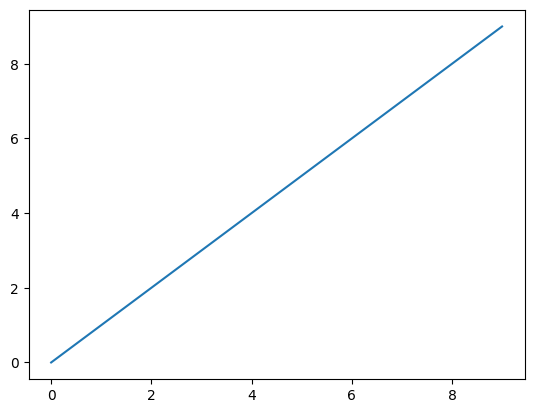

In [154]:
plt.plot(data)

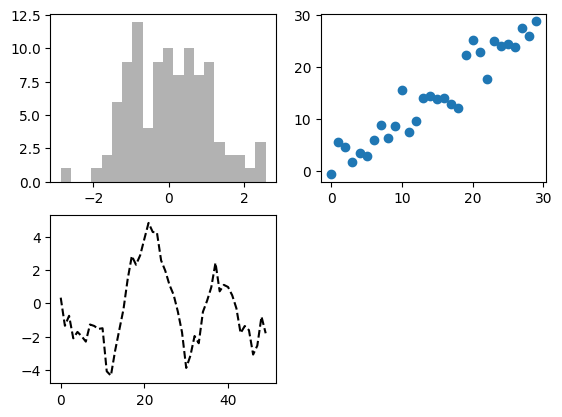

In [163]:
# Creating a figure object
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Plots
ax3.plot(np.random.standard_normal(50).cumsum(),
         color="black",
        linestyle="dashed");
# ';' used to supress the output about the object added to the plot
ax1.hist(np.random.standard_normal(100),
         bins=20,
         color="black",
         alpha=0.3);
ax2.scatter(np.arange(30),
            np.arange(30) + 3*np.random.standard_normal(30));

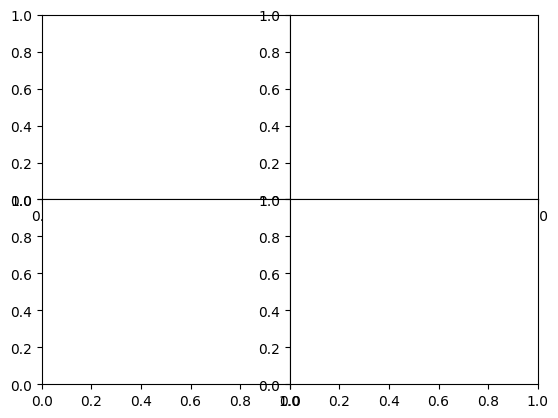

In [175]:
fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0,
                    hspace=0)

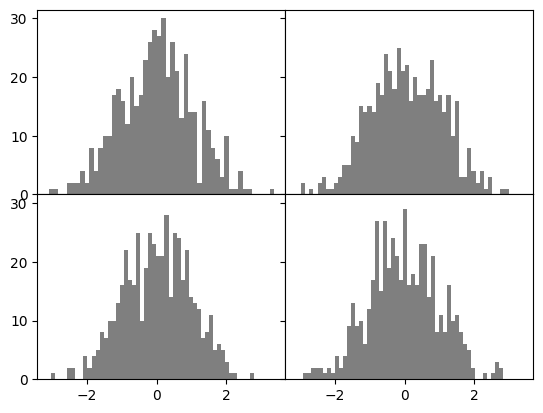

In [174]:
# adjusting wspace, hspace
fig, axes = plt.subplots(2, 2, sharex=True,
                         sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500),
                        bins=50,
                        color='black',
                        alpha=0.5)
fig.subplots_adjust(wspace=0,
                    hspace=0)